<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

pip install scikit-learn

In [3]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from src.SupportPreProcesamiento import (
    exploracion_dataframe,
    separarar_df,
    plot_numericas,
    plot_categoricas,
    relacion_vr_categoricas,
    relacion_vr_numericas,
    matriz_correlacion,
    detectar_outliers,
    diferencia_tras_rellenar_nulos
)

pd.set_option('display.float_format', '{:.2f}'.format)


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("../../datos/05_Modelo5/01_autorenew.csv")

In [5]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.00,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.00,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,161.00,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manually,74.00,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manually,68.00,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


# EDA
Vamos a realizar lo siguiente mediante las funciones previamente definidas:
- explorar la info del Dataframe
- visualizar las numéricas con un histplot
- visualizar las categoricas con un countplot
- visualizar los outliers con un boxplot
- visualizar correlacion con heatmap
- visualizar categoricas vs variable respuesta(barplot)
- visualizar numericas vs variable respuesta con un (scatterplot)

### Explorar la info del Dataframe
Vamos a ver primero que datos tenemos y con que vamos a trabajar vamos a usar la funcion explorar DataFrame, usando como columna control


In [6]:
exploracion_dataframe(df,"price",estadisticos=False)

El número de datos es 371528 y el de columnas es 20

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 4

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
vehicleType,36.00
gearbox,5.44
model,5.51
fuelType,8.99
notRepairedDamage,19.40



 ..................... 

Los tipos de las columnas son:


,tipo_dato
dateCrawled,object
name,object
seller,object
offerType,object
price,int64
abtest,object
vehicleType,object
yearOfRegistration,int64
gearbox,object
powerCV,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna DATECRAWLED tiene las siguientes valore únicos:


,count
dateCrawled,
2016-03-24 14:49:47,7
2016-03-26 22:57:31,6
2016-03-19 21:49:56,6
2016-03-22 10:42:10,5
2016-04-04 22:38:11,5


La columna NAME tiene las siguientes valore únicos:


,count
name,
Ford_Fiesta,657
BMW_318i,627
Opel_Corsa,622
Volkswagen_Golf_1.4,603
BMW_316i,523


La columna SELLER tiene las siguientes valore únicos:


,count
seller,
private,371525
commercial,3


La columna OFFERTYPE tiene las siguientes valore únicos:


,count
offerType,
offer,371516
request,12


La columna ABTEST tiene las siguientes valore únicos:


,count
abtest,
test,192585
control,178943


La columna VEHICLETYPE tiene las siguientes valore únicos:


,count
vehicleType,
small car,80023
combi,67564
bus,30201
convertible,22898
coupe,19015


La columna GEARBOX tiene las siguientes valore únicos:


,count
gearbox,
manually,274214
automatic,77105


La columna MODEL tiene las siguientes valore únicos:


,count
model,
golf,30070
andere,26400
3er,20567
polo,13092
corsa,12573


La columna FUELTYPE tiene las siguientes valore únicos:


,count
fuelType,
petrol,223857
diesel,107746
lpg,5378
cng,571
hybrid,278


La columna BRAND tiene las siguientes valore únicos:


,count
brand,
volkswagen,79640
bmw,40274
opel,40136
mercedes_benz,35309
audi,32873


La columna NOTREPAIREDDAMAGE tiene las siguientes valore únicos:


,count
notRepairedDamage,
no,263182
yes,36286


La columna DATECREATED tiene las siguientes valore únicos:


,count
dateCreated,
2016-04-03 00:00:00,14450
2016-04-04 00:00:00,14022
2016-03-20 00:00:00,13547
2016-03-12 00:00:00,13379
2016-03-21 00:00:00,13305


La columna LASTSEEN tiene las siguientes valore únicos:


,count
lastSeen,
2016-04-06 13:45:54,17
2016-04-07 06:45:59,17
2016-04-07 08:16:54,16
2016-04-06 09:46:00,16
2016-04-06 04:17:20,16


# Nuevo Modelo 4 Gestion duplicados
- Eliminamos los duplicados ahora

In [7]:
df.duplicated().value_counts()

False    371524
True          4
Name: count, dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

### Revisar tipo de nulos que tenemos

In [9]:
df[["vehicleType","gearbox","model","fuelType","notRepairedDamage"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 371524 entries, 0 to 371527
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   vehicleType        237761 non-null  object
 1   gearbox            351315 non-null  object
 2   model              351040 non-null  object
 3   fuelType           338138 non-null  object
 4   notRepairedDamage  299464 non-null  object
dtypes: object(5)
memory usage: 17.0+ MB


In [10]:
for col in df[["vehicleType","gearbox","model","fuelType","notRepairedDamage"]].columns:
    print("\n ..................... \n")
    print(f"{col}")
    display(df[col].unique())


 ..................... 

vehicleType


array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)


 ..................... 

gearbox


array(['manually', 'automatic', nan], dtype=object)


 ..................... 

model


array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'andere', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       'glk', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'colt',
       'impreza', 'vectra', 'berlingo', 'm_klasse', 'tiguan', 'i_reihe',
       'espace', 'sharan', '6_reihe', 'panda', 'up', 'seicento', 'ceed',
       '5_reihe', 'yeti', 'octavia', 'mii', 'rx_reihe', '


 ..................... 

fuelType


array(['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro'], dtype=object)


 ..................... 

notRepairedDamage


array([nan, 'yes', 'no'], dtype=object)

# Conclusiones 
- Tenemos 4 Duplicados
- Tenemos 5 Columnas con nulos:
    - vehicleType: 36% nulos categórica ['nan','coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other']
    - gearbox: 5,5% nulos, categórica ['manually', 'automatic', nan]
    - model: 5,51% nulos, categórica (No la pongo que son muchos)
    - fuelType: 8,98% nulos categórica ['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro']
    - notRepairedDamage 19,39% nulos categorica [nan, 'yes', 'no']



# Las gráficas tardan mucho, porque? veamos:

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371524.00,17295.30,3587973.06,0.00,1150.00,2950.00,7200.00,2147483647.00
yearOfRegistration,371524.00,2004.58,92.87,1000.00,1999.00,2003.00,2008.00,9999.00
powerCV,371524.00,113.97,189.52,0.00,69.00,104.00,148.00,19726.00
kilometer,371524.00,125618.84,40112.14,5000.00,125000.00,150000.00,150000.00,150000.00
monthOfRegistration,371524.00,5.73,3.71,0.00,3.00,6.00,9.00,12.00
nrOfPictures,371524.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
postalCode,371524.00,50820.49,25799.09,1067.00,30459.00,49610.00,71546.00,99998.00


Si miramos el valor máximo, de las columnas, no tiene sentido ni para price, ni yearof, ni powerCV, ni postal code, pero sobre todo vamos a limpiar nuestro DF, number of pictures no nos interesa, si siempre es 0, no afectara

Postal code nos puede interesar

Dropeamos nrOfPictures

In [12]:
df.drop(columns="nrOfPictures",inplace=True)
df.sample()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
78382,2016-04-01 21:57:13,Volkswagen_Transporter_T5_7HJ132/WF2/ZD2,private,offer,4000,test,bus,2003,manually,85.00,transporter,150000,12,diesel,volkswagen,yes,2016-04-01 00:00:00,39106,2016-04-01 22:45:29


## No podemos meter nulos a la variable respuesta
(Pero sí dropear cosas sin sentido...)
### Veamos ahora price

Vamos a elimar las filas cuyo precio sea menor a 100€ ya que, un vehículo no se va a vender por menos de 100€ 

In [13]:
cond = df["price"] < 150
df = df.drop(df[cond].index)
df.reset_index(inplace=True, drop= True)

También vamos a elimar las filas donde el precio sea más de 4.000.000€ ya que, son precios desorbitados, y no son muchas filas, además si nos fijamos son vehículos que no valen eso...

In [14]:
cond = df["price"] > 3000000
df = df.drop(df[cond].index)
df.reset_index(inplace=True, drop= True)

Ahora veamos los valores más elevados

In [15]:
df["price"].nlargest(40).unique()

array([2995000, 2795000, 1600000, 1300000, 1250000, 1234566, 1111111,
       1010010, 1000000,  999999,  999990,  911911,  849000,  820000,
        780000,  745000,  725000,  700000,  650000,  619000])

Valores como [1234566,1111111,1010010,999999,911911,999990] son algo raros, vamos a observarlos y decidir si dropearlos

In [16]:
valores_observar = [1234566,1111111,1010010,999999,911911,999990]
cond = df["price"].isin(valores_observar)
df[cond].sample()#Quita el sample para ver todos!!!

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
55289,2016-03-25 09:56:28,Astra_f_teile,private,offer,1111111,test,NaN,1995,manually,70.00,astra,150000,5,petrol,opel,NaN,2016-03-25 00:00:00,67700,2016-04-06 09:46:21


Salvo 911911 el resto los quitamos

In [17]:
valores_chao = [1234566,1111111,1010010,999999,999990]
cond = df["price"].isin(valores_chao)
df = df.drop(df[cond].index)
df.reset_index(inplace=True,drop=True)

### YearofRegistration
Con el año de registro es fácil, si es mayor de 2024, es nulo

In [18]:
cond = df["yearOfRegistration"] > 2024
df.loc[cond,"yearOfRegistration"] = np.nan


y claro, el coche se invento en 1886, si es menor de eso es NAN

In [19]:
cond = df["yearOfRegistration"] < 1886
df.loc[cond,"yearOfRegistration"] = np.nan

### Month
Verifiquemos que hay

In [21]:
df["monthOfRegistration"].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9])

El mes no nos va a aportar nada de valor tampoco, no me lo voy a cargar, pero si que voy a no tenerlo en cuenta

### PowerCV
un coche no puede tener menos de 5 CV, ni más de 1200 CV, asi que todo lo que se salga de rango, lo dejamos en NAN

In [22]:
cond = df["powerCV"] > 1600
df.loc[cond,"powerCV"] = np.nan

In [23]:
cond = df["powerCV"] < 5
df.loc[cond,"powerCV"] = np.nan

# Postal code
Considero que no la vamos a usar, ademas considero que es una variable categórica

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,356515.00,6065.24,14028.67,150.00,1300.00,3150.00,7500.00,2995000.00
yearOfRegistration,356397.00,2003.50,7.56,1910.00,1999.00,2004.00,2008.00,2019.00
powerCV,321287.00,125.12,65.82,5.00,79.00,114.00,148.00,1578.00
kilometer,356515.00,125796.53,39569.77,5000.00,125000.00,150000.00,150000.00,150000.00
monthOfRegistration,356515.00,5.83,3.67,0.00,3.00,6.00,9.00,12.00
postalCode,356515.00,51022.71,25735.39,1067.00,30851.00,49767.00,71672.00,99998.00


In [25]:
df["kilometer"].isna().value_counts()

kilometer
False    356515
Name: count, dtype: int64

# ¿Con que columnas numéricas vamos a trabajar?
- price
- yearOfRegistration
- powerCV
- Kilometer, que por como es la volveremos categórica

Considero que el resto de columnas no aportan valor 

# Columnas categóricas
Ahora vamos a ver con que columnas categóricas nos quedamos y como gestionamos sus nulos

In [26]:
df.select_dtypes(include="O").head()

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,test,NaN,manually,golf,petrol,volkswagen,NaN,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,test,coupe,manually,NaN,diesel,audi,yes,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,test,suv,automatic,grand,diesel,jeep,NaN,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,test,small car,manually,golf,petrol,volkswagen,no,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,test,small car,manually,fabia,diesel,skoda,no,2016-03-31 00:00:00,2016-04-06 10:17:21


In [27]:
df.select_dtypes(include="O").columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'vehicleType',
       'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'lastSeen'],
      dtype='object')

### Columnas categóricas que tienen que ver con el precio:
- offerType
- vehicleType
- gearbox
- fuelType
- brand
- notRepairedDamage
- seller

De estás veamos si se pueden usar

In [28]:
df["vehicleType"].unique()

array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)

In [29]:
df["gearbox"].unique()

array(['manually', 'automatic', nan], dtype=object)

In [30]:
df["fuelType"].unique()

array(['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro'], dtype=object)

In [31]:
df["brand"].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki',
       'lancia', 'porsche', 'sonstige_autos', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'chrysler', 'jaguar', 'daewoo', 'rover',
       'saab', 'land_rover', 'trabant', 'lada'], dtype=object)

In [32]:
df["notRepairedDamage"].unique()

array([nan, 'yes', 'no'], dtype=object)

In [33]:
df["seller"].unique()

array(['private', 'commercial'], dtype=object)

In [34]:
df["offerType"].unique()

array(['offer', 'request'], dtype=object)

Podemos usarlas, vamos a crear un nuevo Dataframe con las columnas que usaremos, numericas y categóricas

In [35]:
df_old = df.copy() # Para tenerlo por si acaso

In [36]:
df = df[["seller","offerType","brand","vehicleType","fuelType","gearbox","notRepairedDamage","kilometer","powerCV","price","yearOfRegistration"]]
df["kilometer"] = df["kilometer"].astype("O")
df["yearOfRegistration"] = df["yearOfRegistration"].astype("O")

# Nuevo en el Modelo 5
Vamos a categorizar "brand" en:
- gama_extinta: La marca ya no fabrica vehículos
- gama_baja: Vehículos baratos
- gama_media: Vehículos de gama media
- gama_alta: Vehículos caros
- gama_lujo: Los ultra luxury
- unknown: Si no sabemos marca chao

In [38]:
df["brand"].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki',
       'lancia', 'porsche', 'sonstige_autos', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'chrysler', 'jaguar', 'daewoo', 'rover',
       'saab', 'land_rover', 'trabant', 'lada'], dtype=object)

- gama_extinta = ['daewoo','rover','saab','trabant','lancia']
- gama_baja = ['dacia','daihatsu','lada','smart','suzuki','fiat','renault','skoda','peugeot','opel','citroen','chevrolet','nissan']
- gama_media = ['ford','seat','honda','hyundai','subaru','mitsubishi','kia','toyota','chrysler','mazda']
- gama_alta = ['volkswagen','audi','jeep','bmw','mercedes_benz','alfa_romeo','volvo','land_rover','mini']
- gama_lujo = ['porsche','jaguar']
- unknown = ['sonstige_autos']

In [ ]:
gama_extinta = ['daewoo','rover','saab','trabant','lancia']
gama_baja = ['dacia','daihatsu','lada','smart','suzuki','fiat','renault','skoda','peugeot','opel','citroen','chevrolet','nissan']
gama_media = ['ford','seat','honda','hyundai','subaru','mitsubishi','kia','toyota','chrysler','mazda']
gama_alta = ['volkswagen','audi','jeep','bmw','mercedes_benz','alfa_romeo','volvo','land_rover','mini']
gama_lujo = ['porsche','jaguar']
unknown = ['sonstige_autos']

In [48]:
df["gama"] = "unknown"
df.loc[df["brand"].isin(gama_extinta), "gama"] = "gama_extinta"
df.loc[df["brand"].isin(gama_baja), "gama"] = "gama_baja"
df.loc[df["brand"].isin(gama_media), "gama"] = "gama_media"
df.loc[df["brand"].isin(gama_alta), "gama"] = "gama_alta"
df.loc[df["brand"].isin(gama_lujo), "gama"] = "gama_lujo"
df.loc[df["brand"].isin(unknown), "gama"] = "unknown"


In [54]:
df["gama"].value_counts()

gama
gama_alta       191615
gama_baja       101483
gama_media       54970
unknown           3271
gama_lujo         2758
gama_extinta      2418
Name: count, dtype: int64

# Dropeamos brand y nos quedamos con gama

In [51]:
df.drop(columns="brand",inplace=True)

Este es el Df con el que voy a trabajar ahora, vamos a visualizar los datos ahora que ya hemos corregido los valores numéricos y los hemos pasado a NAN si eran datos que no tenían ningún sentido

### Visualizar las numéricas con un histplot


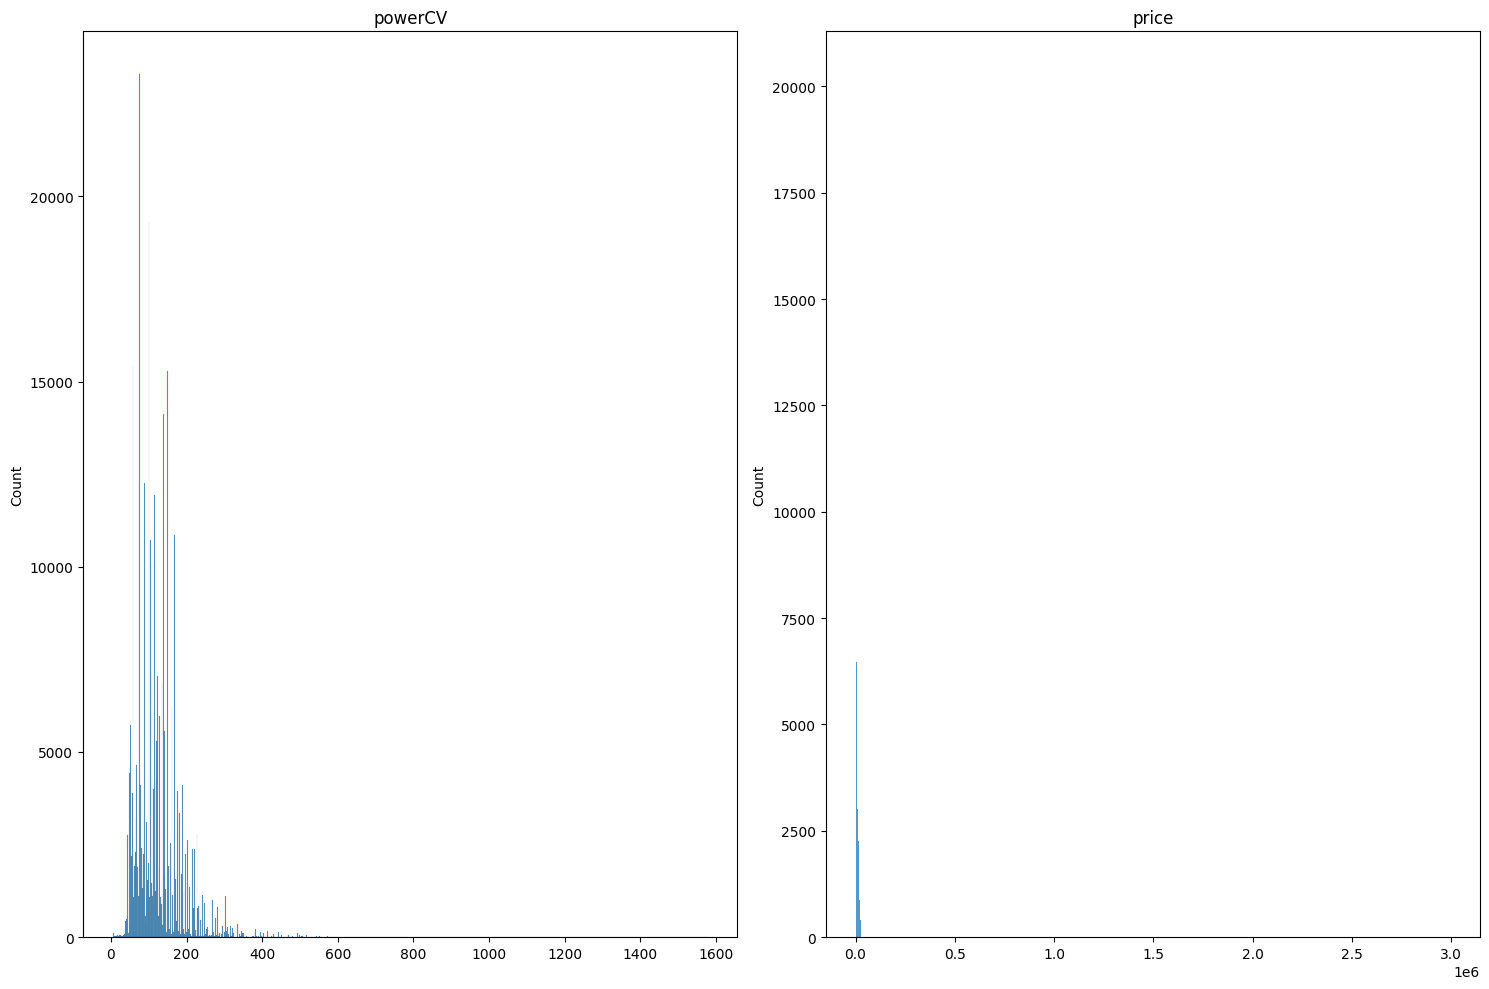

In [52]:
numericas, categoricas = separarar_df(df)
plot_numericas(numericas)

# Sobre la gráfica
Así de primeras podemos decir que la gran mayoría de los coches se encuentran alrededor de los 90 y los 2000, que la potencia se encuentra entre los 100 y 200 CV mayoritariamente y que el precio tiene muchos outliers
- En general hay bastantes outliers, pero son manejables

### Visualizar las categoricas con un countplot


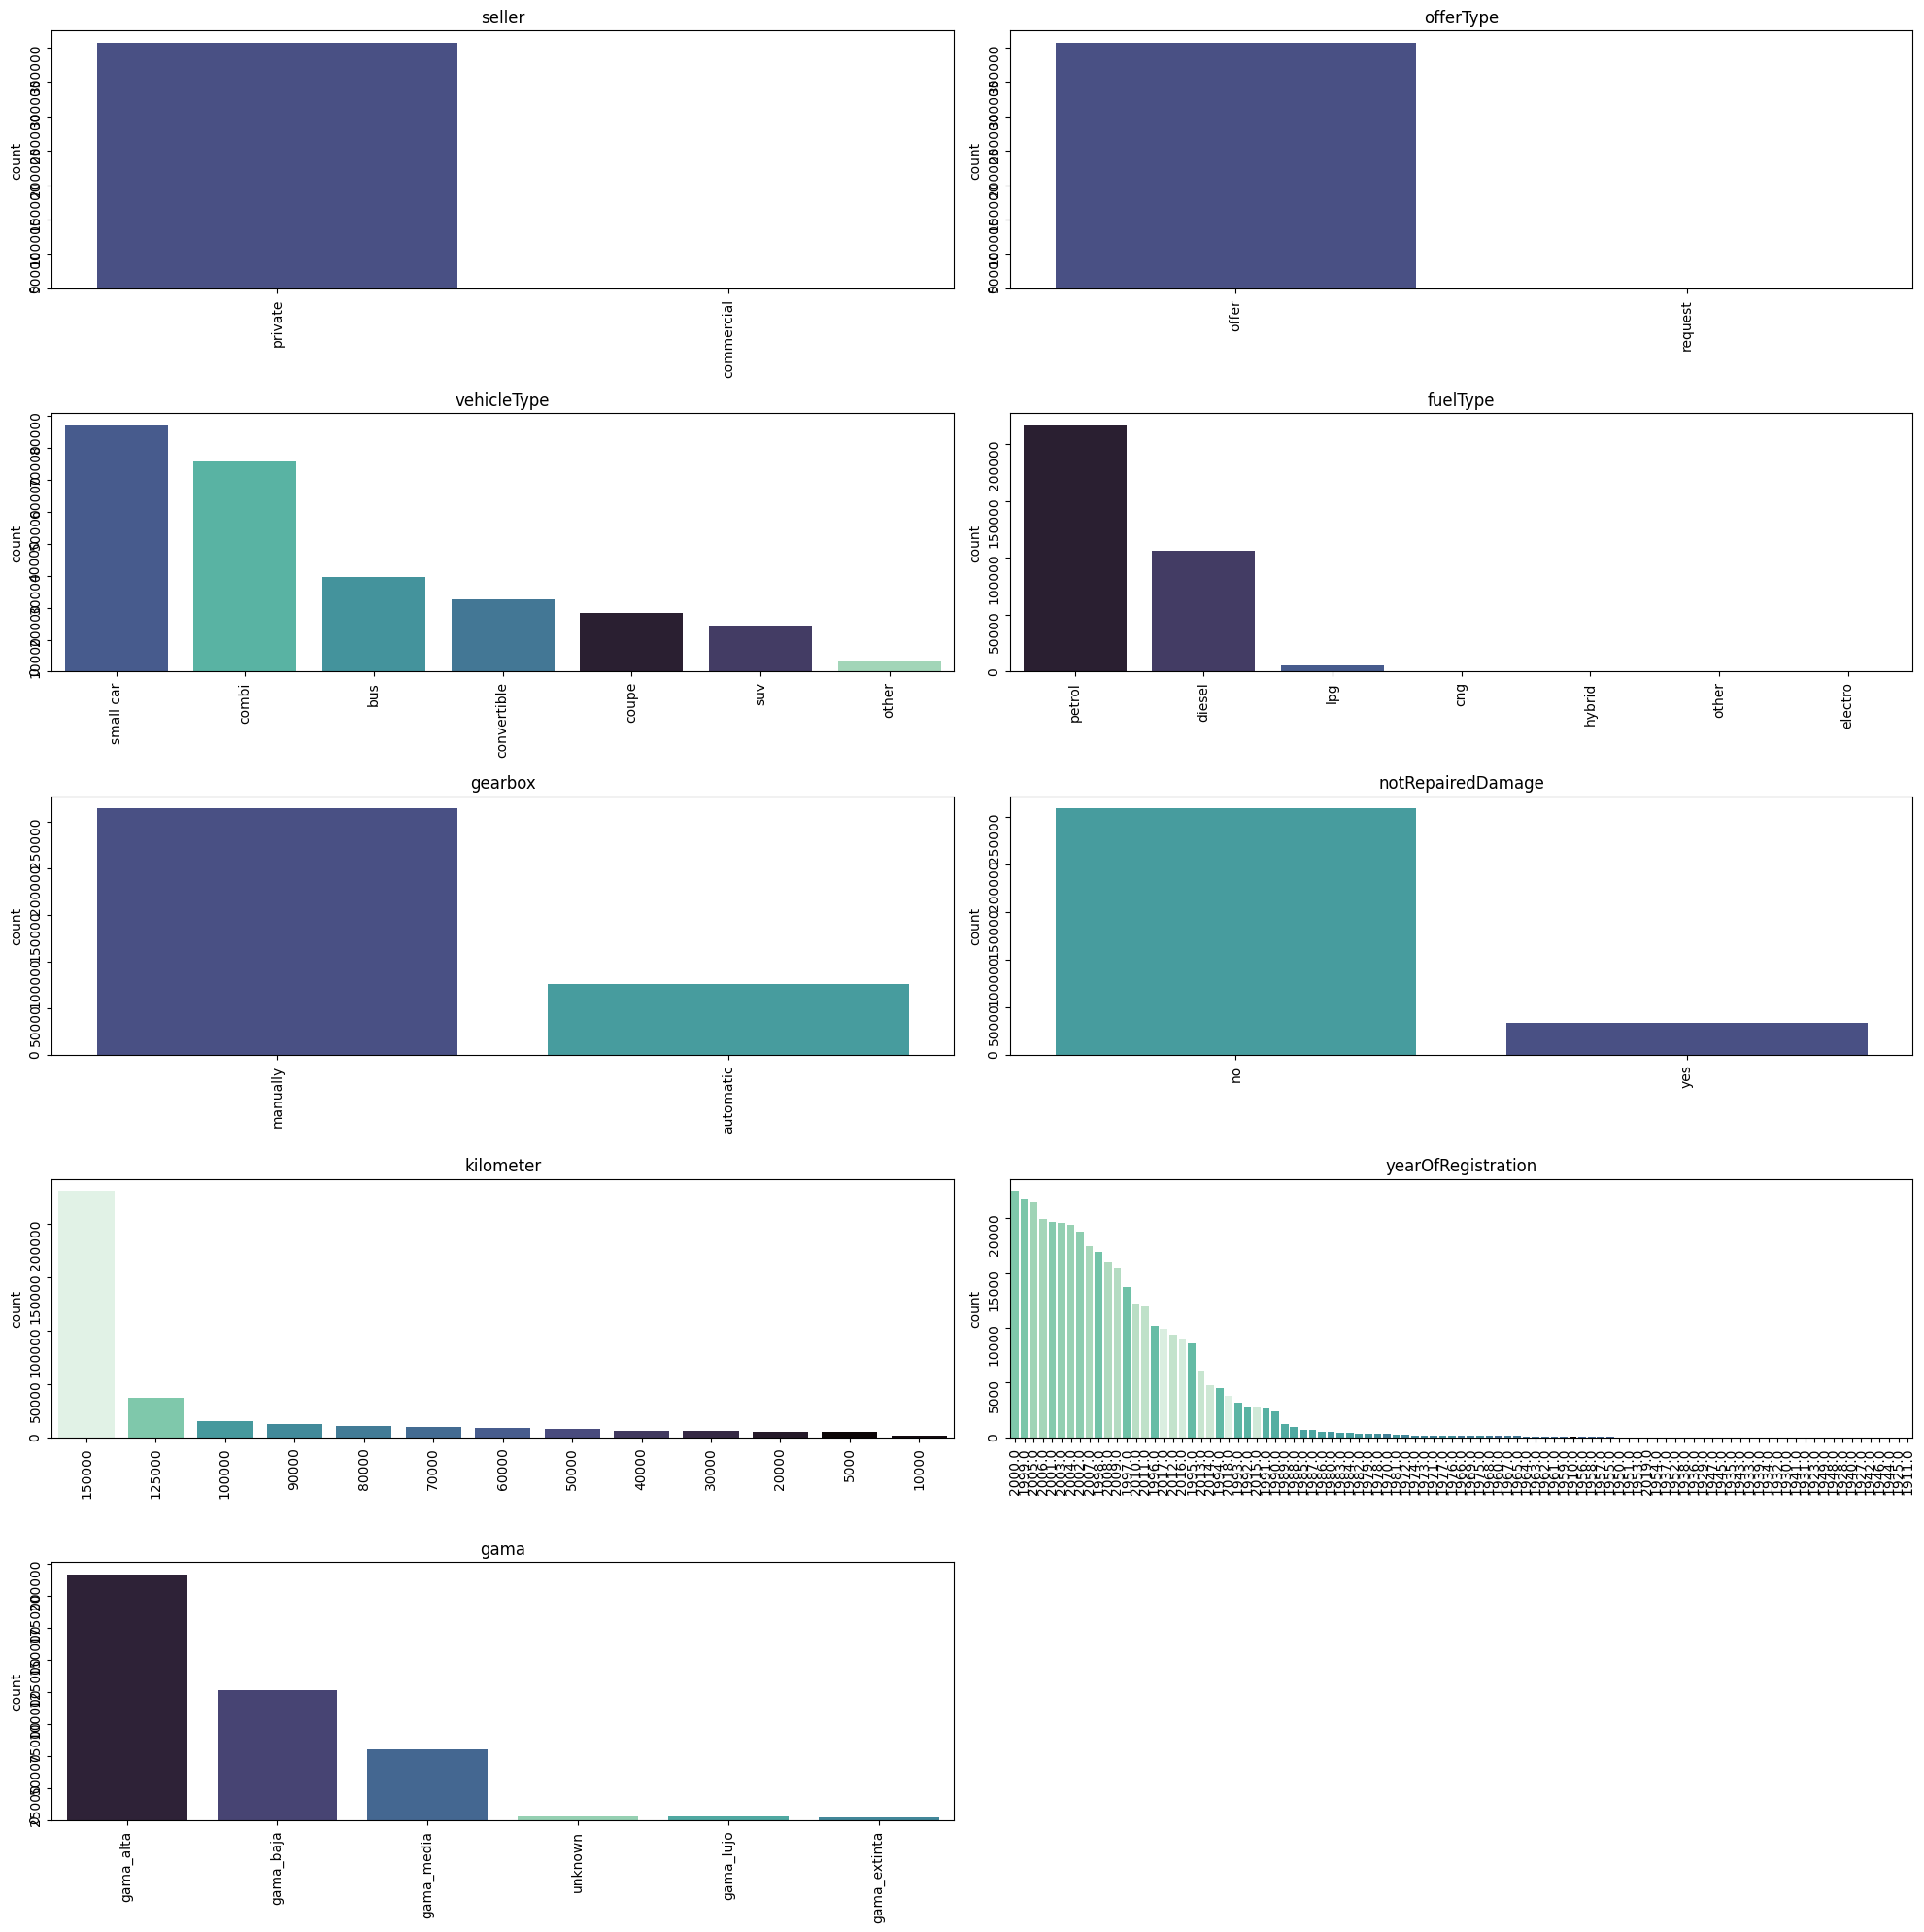

In [53]:
plot_categoricas(categoricas,grafica_size=(20,20))

# Sobre la gráfica
- Mayoritariamente los seller son privados
- Mayoritariamente son ventas, no subastas
- El tipo de vehiculo más anunciado es small car
- Los más anunciados son coches gasolina
- La caja de cambios más anunciada es la manual
- La gran mayoría de los coches no tienen daños
- La mayoría de los coches tienen 150000 km
- La gama_alta es la más anunciada

### Visualizar los outliers con un boxplot


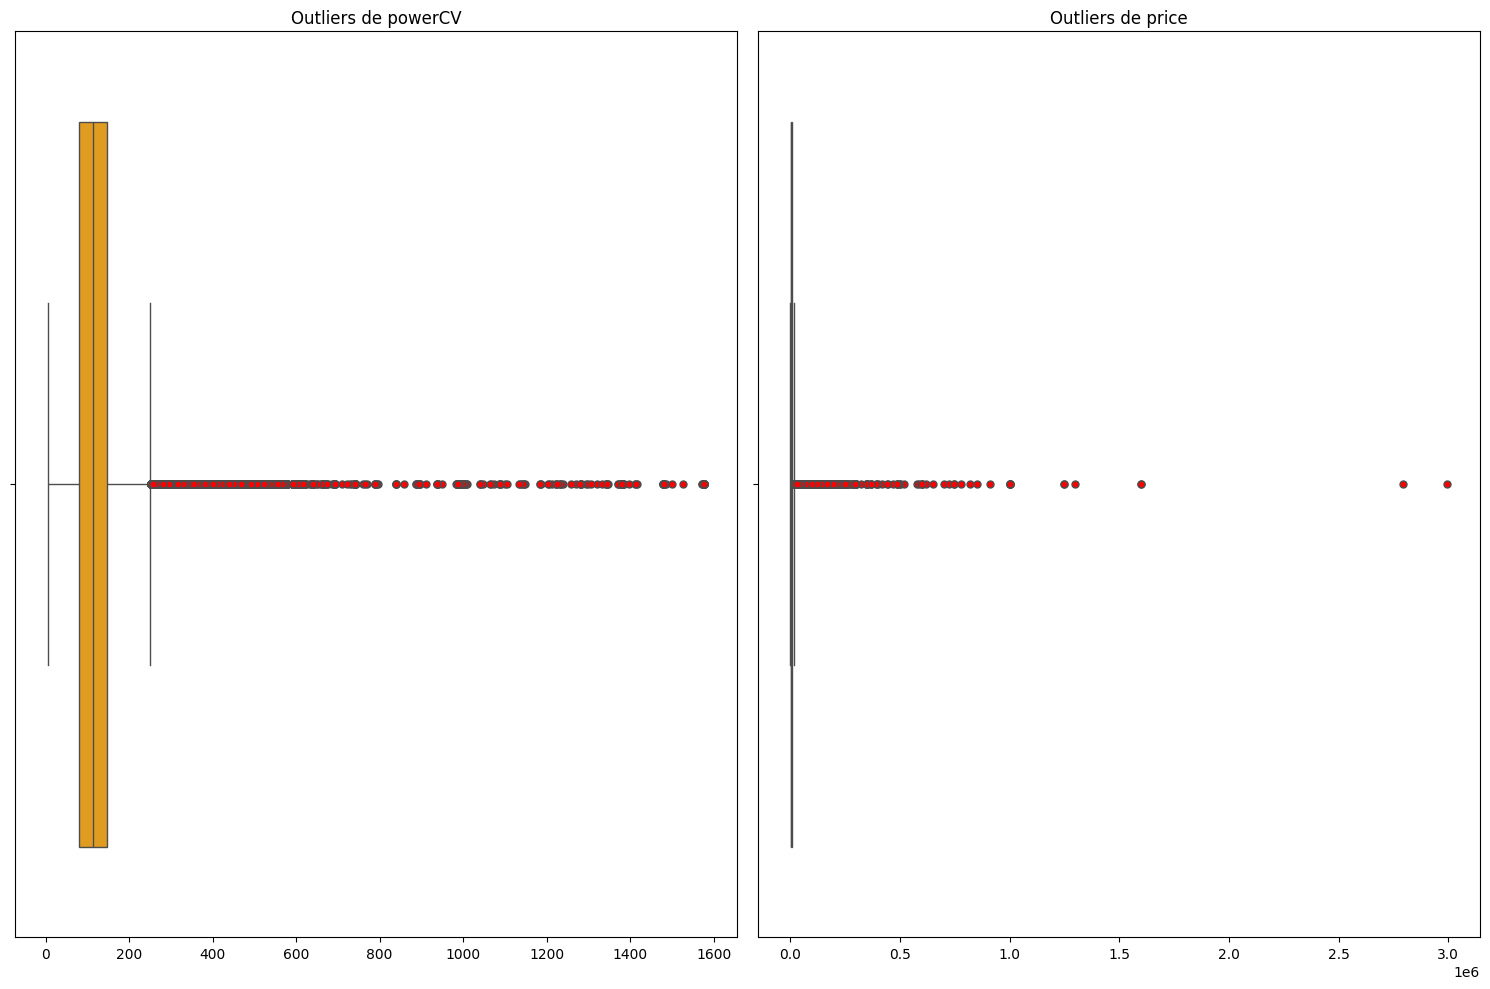

In [55]:
detectar_outliers(df)

# Sobre la gráfica
- Tenemos bastantantes outliers en todas las gráficas
- Hay que tener en cuenta que no todos los coches son iguales así que no tienen porque ser valores incorrectos (que lo pueden ser)
- El más preocupante diría que es precio con outliers tan elevados, aunque aún queda corregir nulos


### Visualizar correlacion con heatmap


Aquí vamos a realizar dos, una del df original y otra del df tal y como está ahora, para asegurarnos de que no hemos perdido nada importante

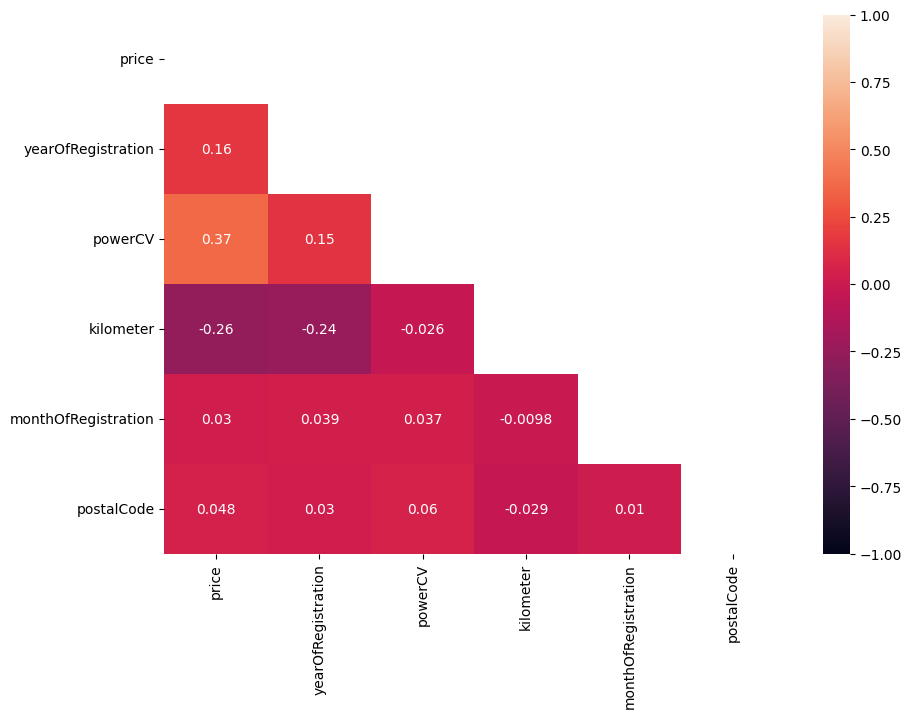

In [56]:
matriz_correlacion(df_old)

# Sobre la Gráfica
- Mayores correlaciones:
    - powerCV con price: 0.37
    - kilometer con price: 0.26
    - kilometer con yearofRegistration: 0.24 pero ahora es categórica,
    - yearofregist con Price: 0.16 pero ahora es categórica
    - powerCV con yearofRegistration: 0.15

    La correlación es baja, pero estás son las más altas, realmente deberíamos añadir los kilómetros (aqui me vuelvo a corregir eso)

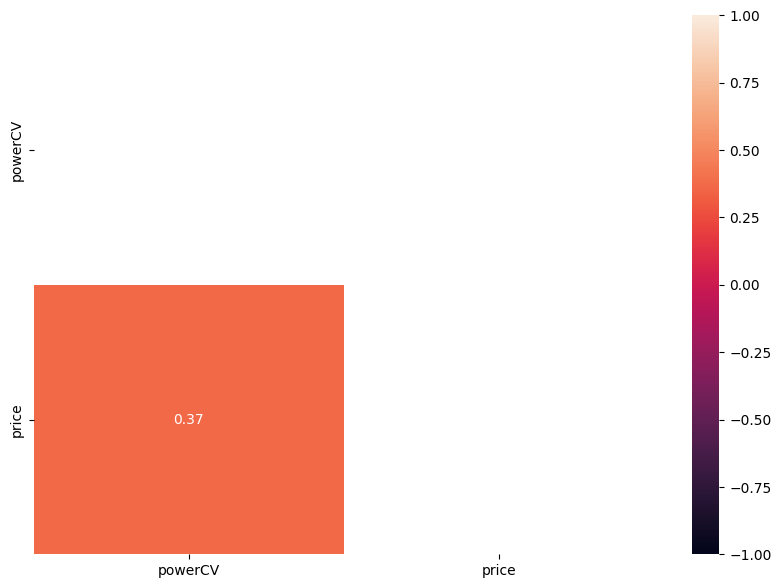

In [57]:
matriz_correlacion(df)

# Sobre la gráfica
- Viendo la anterior, hemos hecho bien, nos hemos quedado con los valores más correlacionados entre sí

### Visualizar categoricas vs variable respuesta(barplot)


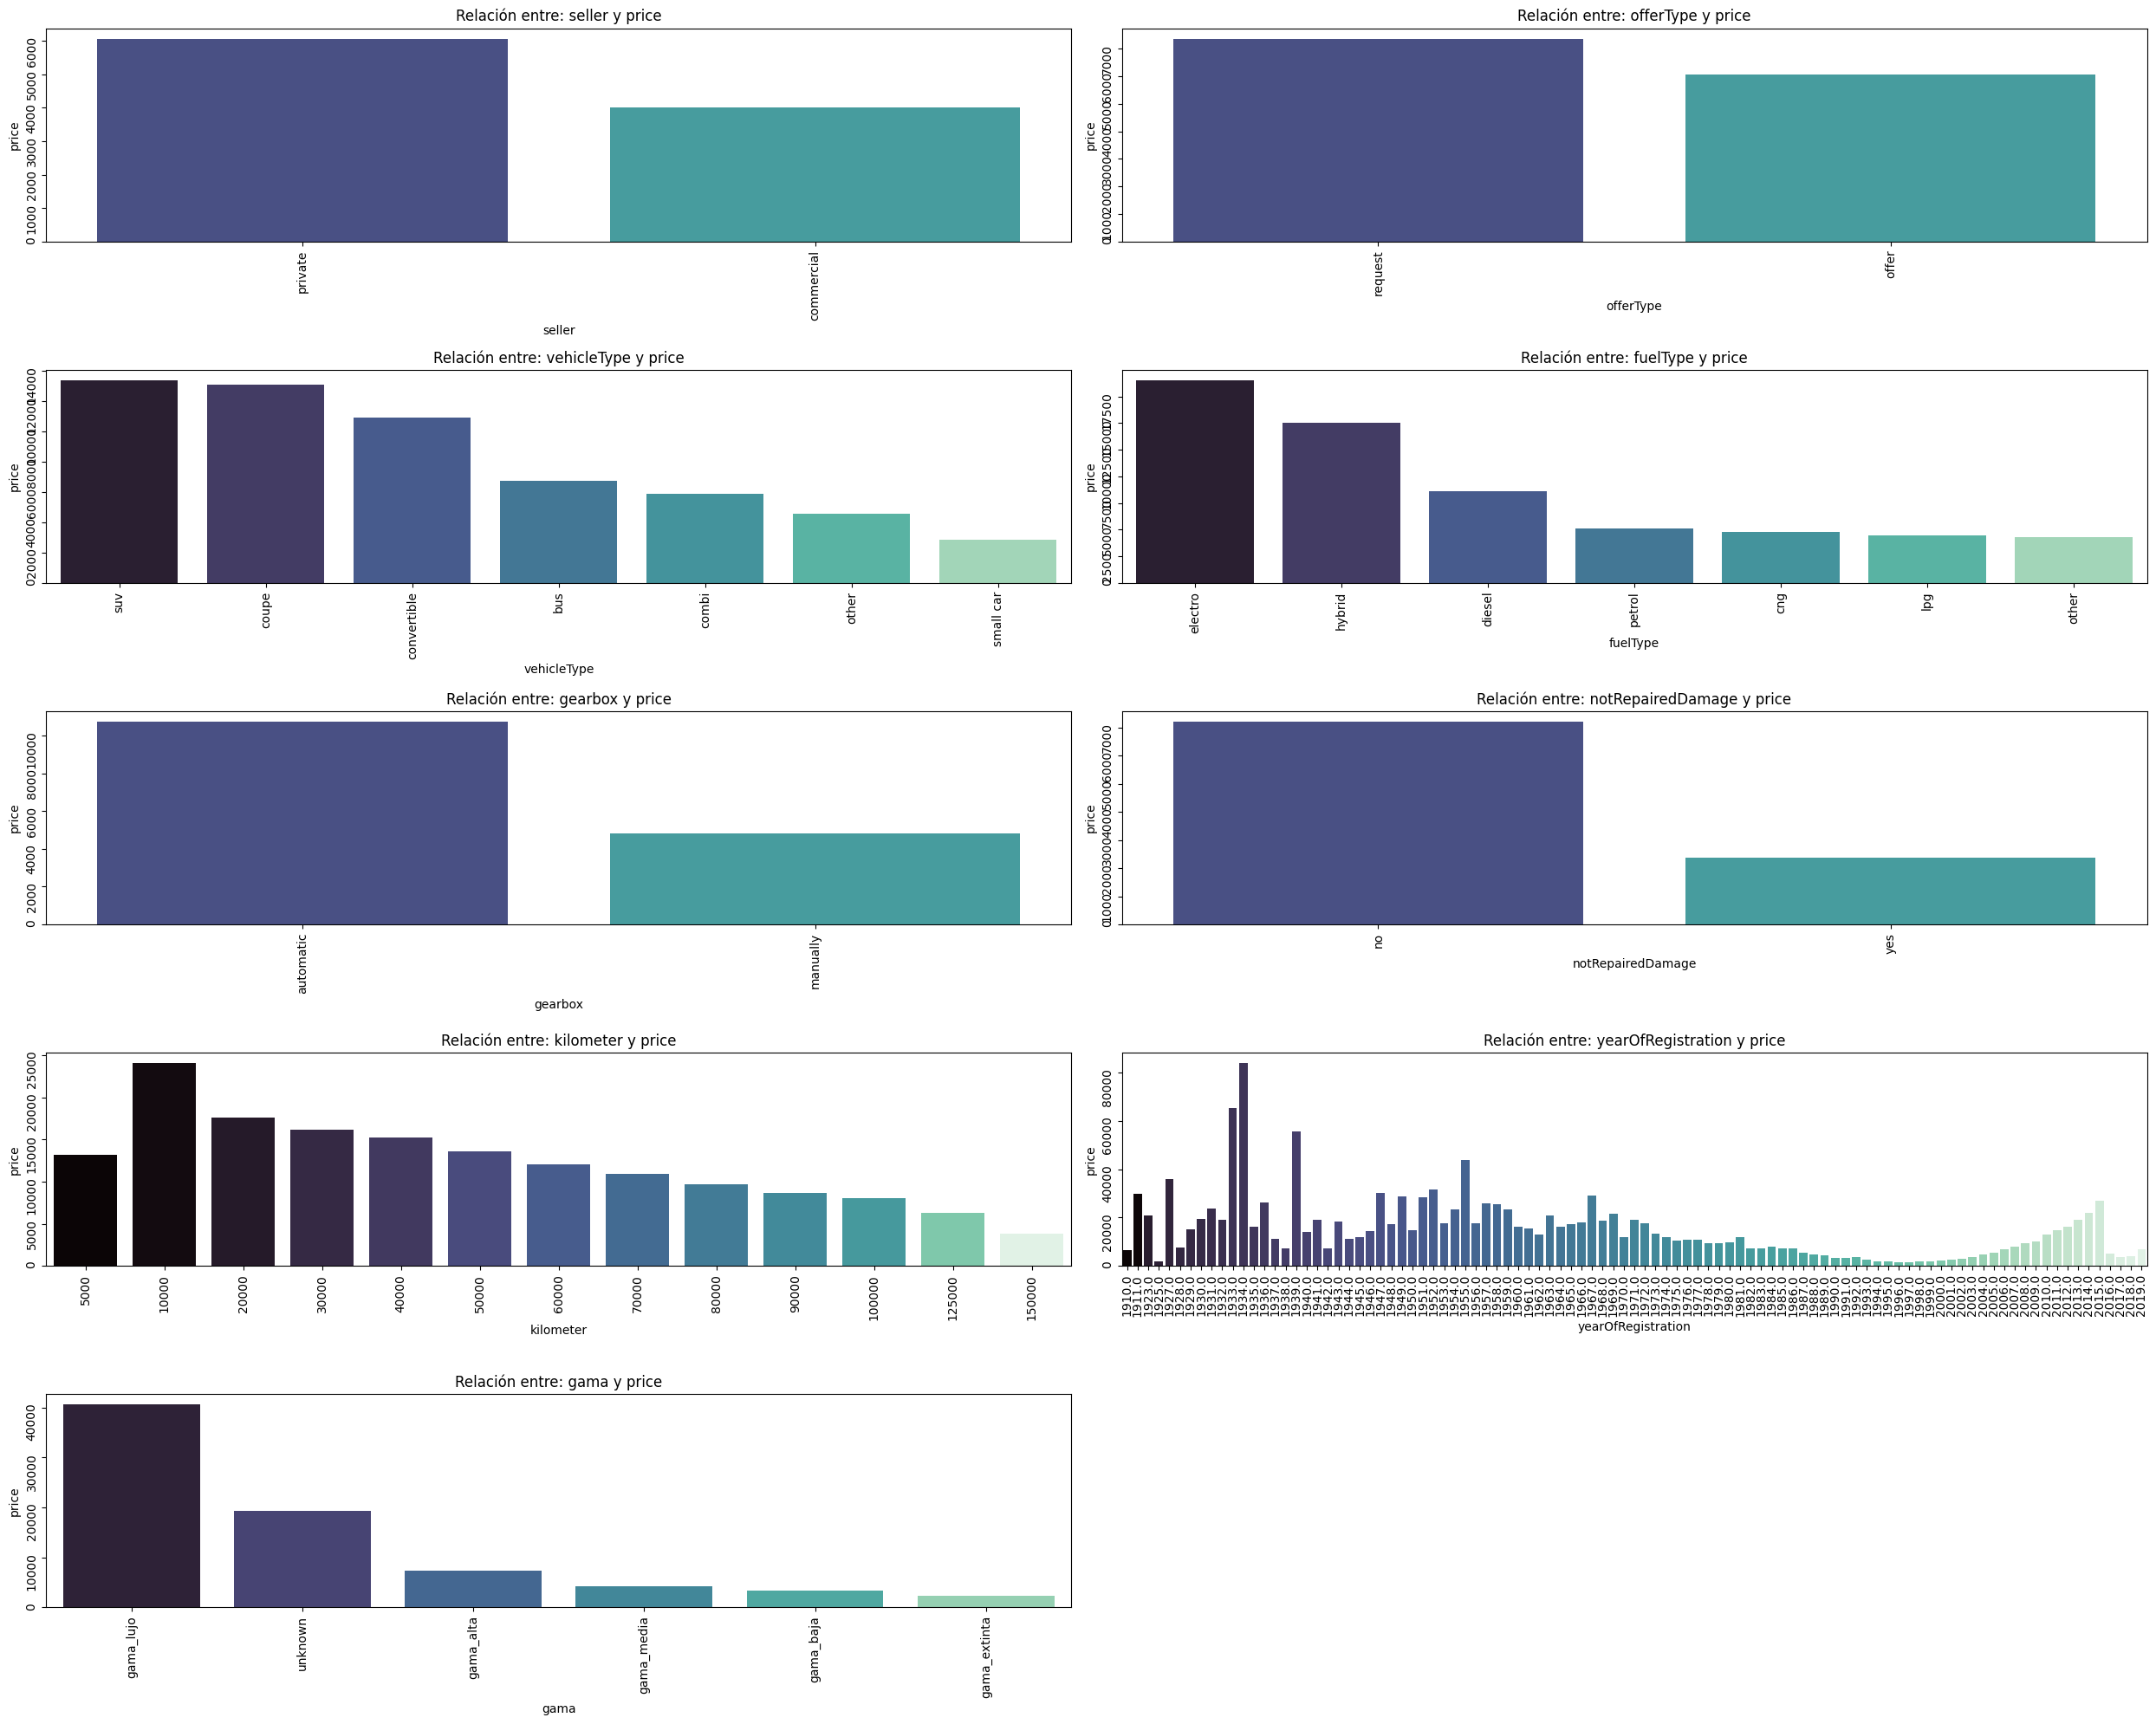

In [58]:
relacion_vr_categoricas(df,"price",grafica_size=(25,20))

# Sobre la gráfica
- El precio parece ser menor en promedio en las ventas de comercial, los privados sacan mças de promedio
- Las subastas sacan de promedio más dinero
- Los coupé y suvs son los más caros, small car el más barato.
- Los vehículos electrícos, híbridos y diesel los más caros, gasolina, cng y lpg son más baratos.
- Los automáticos son más caros que los manuales ( y menos divertidos).
- Los vehículos con daños sin reparar son mucho más baratos
- Los vehículos de 5000 km son más baratos que los de 10.000,20.000... revisar nulos
- Precio y registrationPrice, habrá que revisar, pero podrían ser vehículos de colección
- Gama_lujo es la más cara, le sigue unkown, el orden tiene sentido

### Visualizar numericas vs variable respuesta con un (scatterplot)

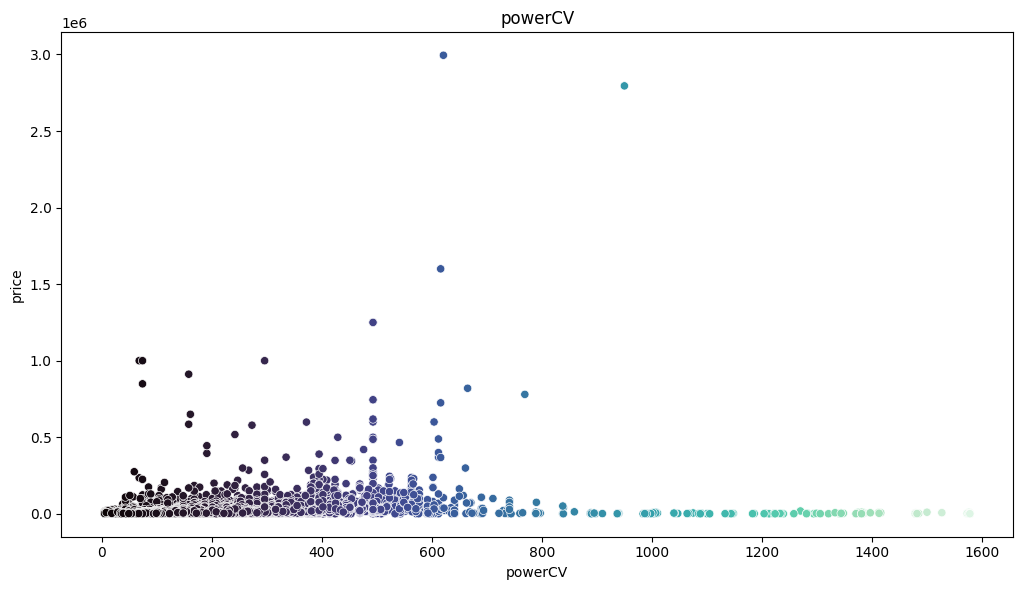

In [59]:
relacion_vr_numericas(df,"price",grafica_size=(20,6))

# Sobre la gráfica

- La mayoría de los coches tienen entre 0 y 400 CV de potencia
- outliers con coches de 800 CV, deberían ser de lujo o superdeportivos
- A partir de 800CV los vehículos son demasiado baratos es probable que sean valores incorrectos, los voy a nulificar?


In [60]:
cond = df["powerCV"] > 800
df[cond].shape

(145, 11)

Los voy a nulificar

In [61]:
cond = df["powerCV"] > 800
df[cond]["gama"].unique()

array(['gama_media', 'gama_baja', 'gama_extinta', 'gama_alta', 'unknown'],
      dtype=object)

Son todo marcas que no han tenido esa potencia nunca (salvando mercedes y bmw)

In [62]:
condicion = df["powerCV"] > 800
c2 = df["gama"] != "gama_alta"
df.loc[condicion & c2,"powerCV"] = np.nan


Ahora que ya hemos reducido los outliers excesivos, podemos empezar a trabajar los nulos

2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

Ahora vamos a rellenar nulos!

# Columnas categóricas

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356515 entries, 0 to 356514
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   seller              356515 non-null  object 
 1   offerType           356515 non-null  object 
 2   vehicleType         230768 non-null  object 
 3   fuelType            328213 non-null  object 
 4   gearbox             340228 non-null  object 
 5   notRepairedDamage   292096 non-null  object 
 6   kilometer           356515 non-null  object 
 7   powerCV             321208 non-null  float64
 8   price               356515 non-null  int64  
 9   yearOfRegistration  356397 non-null  object 
 10  gama                356515 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 29.9+ MB


In [64]:
exploracion_dataframe(df,"price")

El número de datos es 356515 y el de columnas es 11

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 59168

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
vehicleType,35.27
fuelType,7.94
gearbox,4.57
notRepairedDamage,18.07
powerCV,9.90
yearOfRegistration,0.03



 ..................... 

Los tipos de las columnas son:


,tipo_dato
seller,object
offerType,object
vehicleType,object
fuelType,object
gearbox,object
notRepairedDamage,object
kilometer,object
powerCV,float64
price,int64
yearOfRegistration,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna SELLER tiene las siguientes valore únicos:


,count
seller,
private,356513
commercial,2


La columna OFFERTYPE tiene las siguientes valore únicos:


,count
offerType,
offer,356509
request,6


La columna VEHICLETYPE tiene las siguientes valore únicos:


,count
vehicleType,
small car,76949
combi,65737
bus,29666
convertible,22494
coupe,18358


La columna FUELTYPE tiene las siguientes valore únicos:


,count
fuelType,
petrol,216006
diesel,105905
lpg,5221
cng,555
hybrid,270


La columna GEARBOX tiene las siguientes valore únicos:


,count
gearbox,
manually,264821
automatic,75407


La columna NOTREPAIREDDAMAGE tiene las siguientes valore únicos:


,count
notRepairedDamage,
no,258956
yes,33140


La columna KILOMETER tiene las siguientes valore únicos:


,count
kilometer,
150000,230349
125000,37125
100000,15321
90000,12299
80000,10854


La columna YEAROFREGISTRATION tiene las siguientes valore únicos:


,count
yearOfRegistration,
2000.00,22460
1999.00,21775
2005.00,21533
2006.00,19964
2001.00,19633


La columna GAMA tiene las siguientes valore únicos:


,count
gama,
gama_alta,191615
gama_baja,101483
gama_media,54970
unknown,3271
gama_lujo,2758


# Columnas Nulas
- vehicleType : Categórica
- fuelType	: Categórica
- gearbox : Categórica
- notRepairedDamage	: Categórica


### Vehicle Type

In [65]:
df["vehicleType"].unique()

array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)

Para la primera pondremos los nan en "other"

In [66]:
df["vehicleType"] = df["vehicleType"].fillna("other")
df["vehicleType"].unique()

array(['other', 'coupe', 'suv', 'small car', 'convertible', 'bus',
       'combi'], dtype=object)

### Fuel Type

In [67]:
df["fuelType"].unique()

array(['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro'], dtype=object)

Para fuel pondremos los nan en "other"

In [68]:
df["fuelType"] = df["fuelType"].fillna("other")
df["fuelType"].unique()

array(['petrol', 'diesel', 'other', 'lpg', 'hybrid', 'cng', 'electro'],
      dtype=object)

### Gearbox

In [69]:
df["gearbox"].unique()

array(['manually', 'automatic', nan], dtype=object)

Lo pondremos como unknown

In [70]:
df["gearbox"] = df["gearbox"].fillna("unknown")
df["gearbox"].unique()

array(['manually', 'automatic', 'unknown'], dtype=object)

### Not Repaired Damage

In [71]:
df["notRepairedDamage"].unique()

array([nan, 'yes', 'no'], dtype=object)

Lo pondremos como unknown

In [72]:
df["notRepairedDamage"] = df["notRepairedDamage"].fillna("unknown")
df["notRepairedDamage"].unique()

array(['unknown', 'yes', 'no'], dtype=object)

### Registered

Vamos a crear una buena categoría, veamos años únicos

In [73]:
df["yearOfRegistration"].sort_values().unique()

array([1910.0, 1911.0, 1923.0, 1925.0, 1927.0, 1928.0, 1929.0, 1930.0,
       1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0,
       1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0,
       1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0,
       1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0,
       1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0,
       1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0,
       1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0,
       1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0,
       1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0,
       2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0,
       2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0,
       2019.0, nan], dtype=object)

va de 1910 a 2019, vamos a realizar las siguientes categorías
- 'Los 1910s',
- 'Los 1920s',
- 'Los 1930s',
- 'Los 1940s',
- 'Los 1950s',
- 'Los 1960s',
- 'Los 1970s',
- 'Los 80',
- 'Los 90',
- 'Los 2000',
- 'Los 2010'

Como lo hare? la década la puedo sacar dividiendo por 10 absoluto (//) y multiplicando por 10


In [74]:
df["yearOfRegistration"] = df["yearOfRegistration"] //10 * 10
df["yearOfRegistration"].sort_values().unique()


array([1910.0, 1920.0, 1930.0, 1940.0, 1950.0, 1960.0, 1970.0, 1980.0,
       1990.0, 2000.0, 2010.0, nan], dtype=object)

Ahora paso a una lista esto, y genero un diccionario! 

In [75]:
years = df["yearOfRegistration"].sort_values().unique()
lista_years = years.tolist()
lista_decadas = ["The 10's","The 20's","The 30's","The 40's","The 50's","The 60's","The 70's","The 80's","The 90's","The 2000","The 2010","unknown"]
dictio_decada = {}
for i, year in enumerate(lista_years):
    try:
        yeah = int(year)
    except: 
        yeah = np.nan
    dictio_decada[yeah] = lista_decadas[i]

dictio_decada

{1910: "The 10's",
 1920: "The 20's",
 1930: "The 30's",
 1940: "The 40's",
 1950: "The 50's",
 1960: "The 60's",
 1970: "The 70's",
 1980: "The 80's",
 1990: "The 90's",
 2000: 'The 2000',
 2010: 'The 2010',
 nan: 'unknown'}

Y ahora reemplazamos

In [76]:
df["yearOfRegistration"] = df["yearOfRegistration"].map(dictio_decada)

In [77]:
df.sample(5)

,seller,offerType,vehicleType,fuelType,gearbox,notRepairedDamage,kilometer,powerCV,price,yearOfRegistration,gama
114647,private,offer,small car,petrol,automatic,unknown,125000,159.00,10490,The 2000,gama_alta
247376,private,offer,combi,petrol,manually,no,10000,181.00,36900,The 2010,gama_alta
147142,private,offer,combi,diesel,automatic,yes,150000,NaN,14000,The 2000,gama_alta
327102,private,offer,other,petrol,manually,no,60000,NaN,5000,The 2000,gama_media
190325,private,offer,coupe,petrol,manually,no,60000,114.00,8300,The 2000,gama_baja


Para ver si han cambiado los datos, vamos a guardar el df aquí

In [78]:
df_previo = df.copy()

Hagamos dos dataframes para ver que metodo de imputación funciona mejor

In [79]:
df1 = df.copy()
df2 = df.copy()

# Columnas numéricas
### Nulas
- powerCV	: numérica
- price	: numérica
- yearOfRegistration : numérica

Veamos información sobre los mismos:


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
powerCV,321208.00,124.86,63.67,5.00,79.00,114.00,148.00,1578.00
price,356515.00,6065.24,14028.67,150.00,1300.00,3150.00,7500.00,2995000.00


In [81]:
df1.isnull().sum()

seller                    0
offerType                 0
vehicleType               0
fuelType                  0
gearbox                   0
notRepairedDamage         0
kilometer                 0
powerCV               35307
price                     0
yearOfRegistration        0
gama                      0
dtype: int64

# Realizamos el Random Forest
- A diferencia del Modelo 1 Vamos a intentar Rellenar los nulos con Random Forest

In [82]:
df_num = df1.select_dtypes(include=np.number)

# Random Forest
iterative_imputer = IterativeImputer(
    estimator=RandomForestRegressor(random_state=42),
    #max_iter=10,  # Número de iteraciones para ajustar los valores
    random_state=42
)

df_num_imputado = iterative_imputer.fit_transform(df_num)
df_num_sin_nulos = pd.DataFrame(df_num_imputado, columns=df_num.columns)
df_rf = df1.copy()
df_rf[df_num.columns] = df_num_sin_nulos
df_rf.isnull().sum()


seller                0
offerType             0
vehicleType           0
fuelType              0
gearbox               0
notRepairedDamage     0
kilometer             0
powerCV               0
price                 0
yearOfRegistration    0
gama                  0
dtype: int64

Tarda 25 segundos

# Guardamos

Veremos si mejora nuestros resultados

In [83]:
df_rf.to_csv("../../datos/05_Modelo5/02_autorenew_sin_nulos.csv")

# Gráficas Ahora!
Cómo se nos queda?

### Visualizar las numéricas con un histplot


In [84]:
df = pd.read_csv("../../datos/05_Modelo5/02_autorenew_sin_nulos.csv",index_col=0)
df["kilometer"] = df["kilometer"].astype(object)

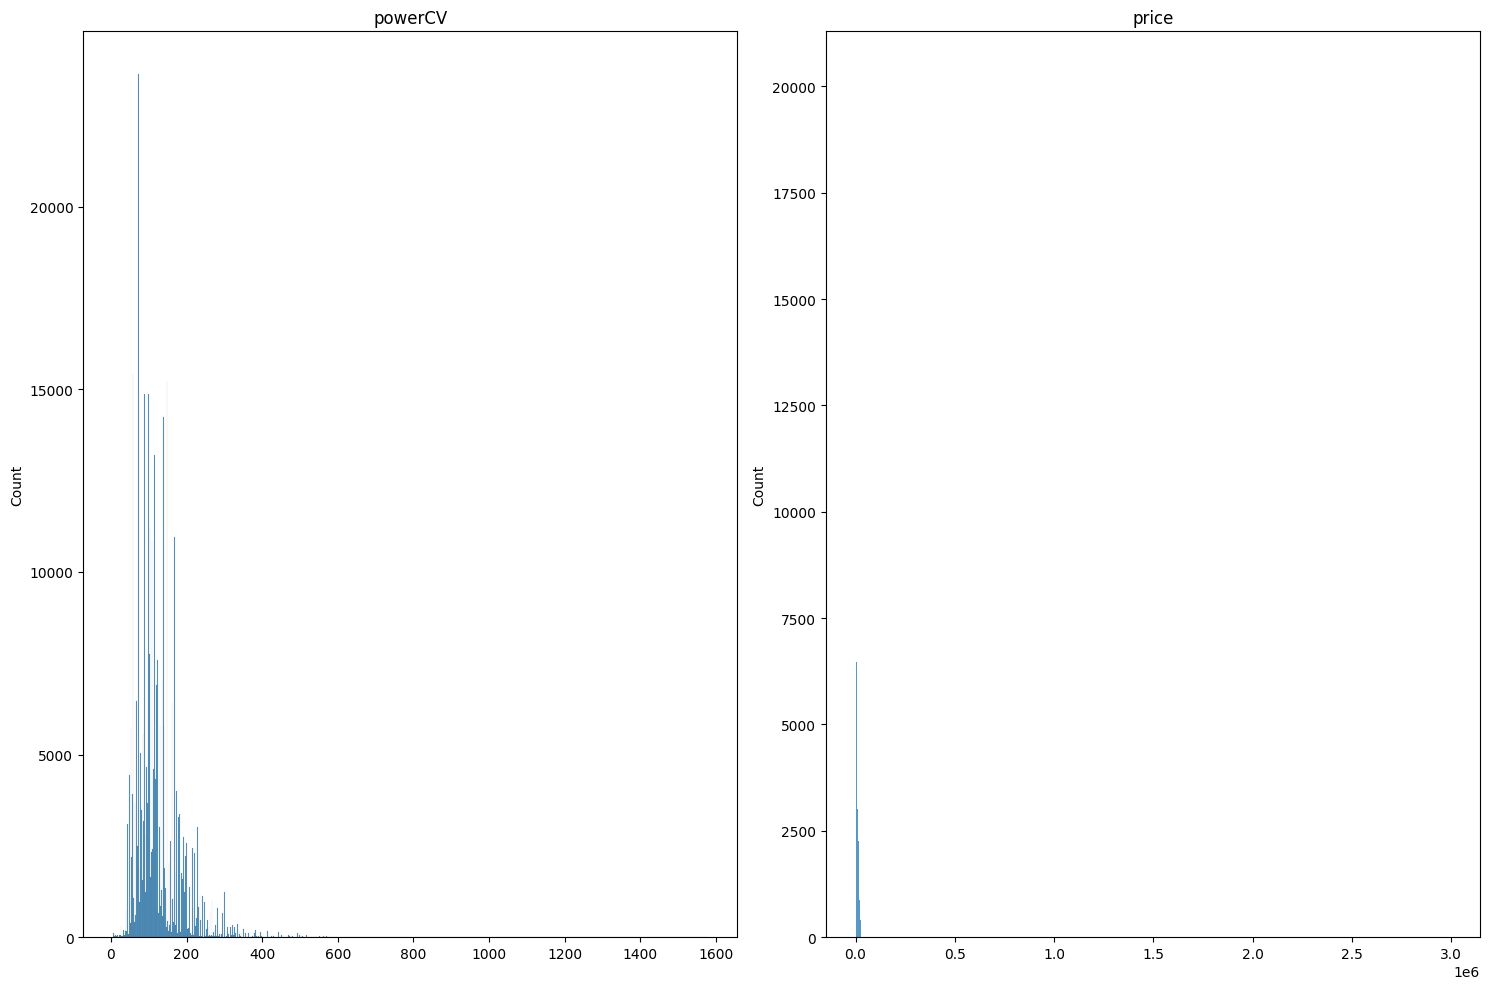

In [85]:
numericas, categoricas = separarar_df(df)
plot_numericas(numericas)

### Visualizar las categoricas con un countplot

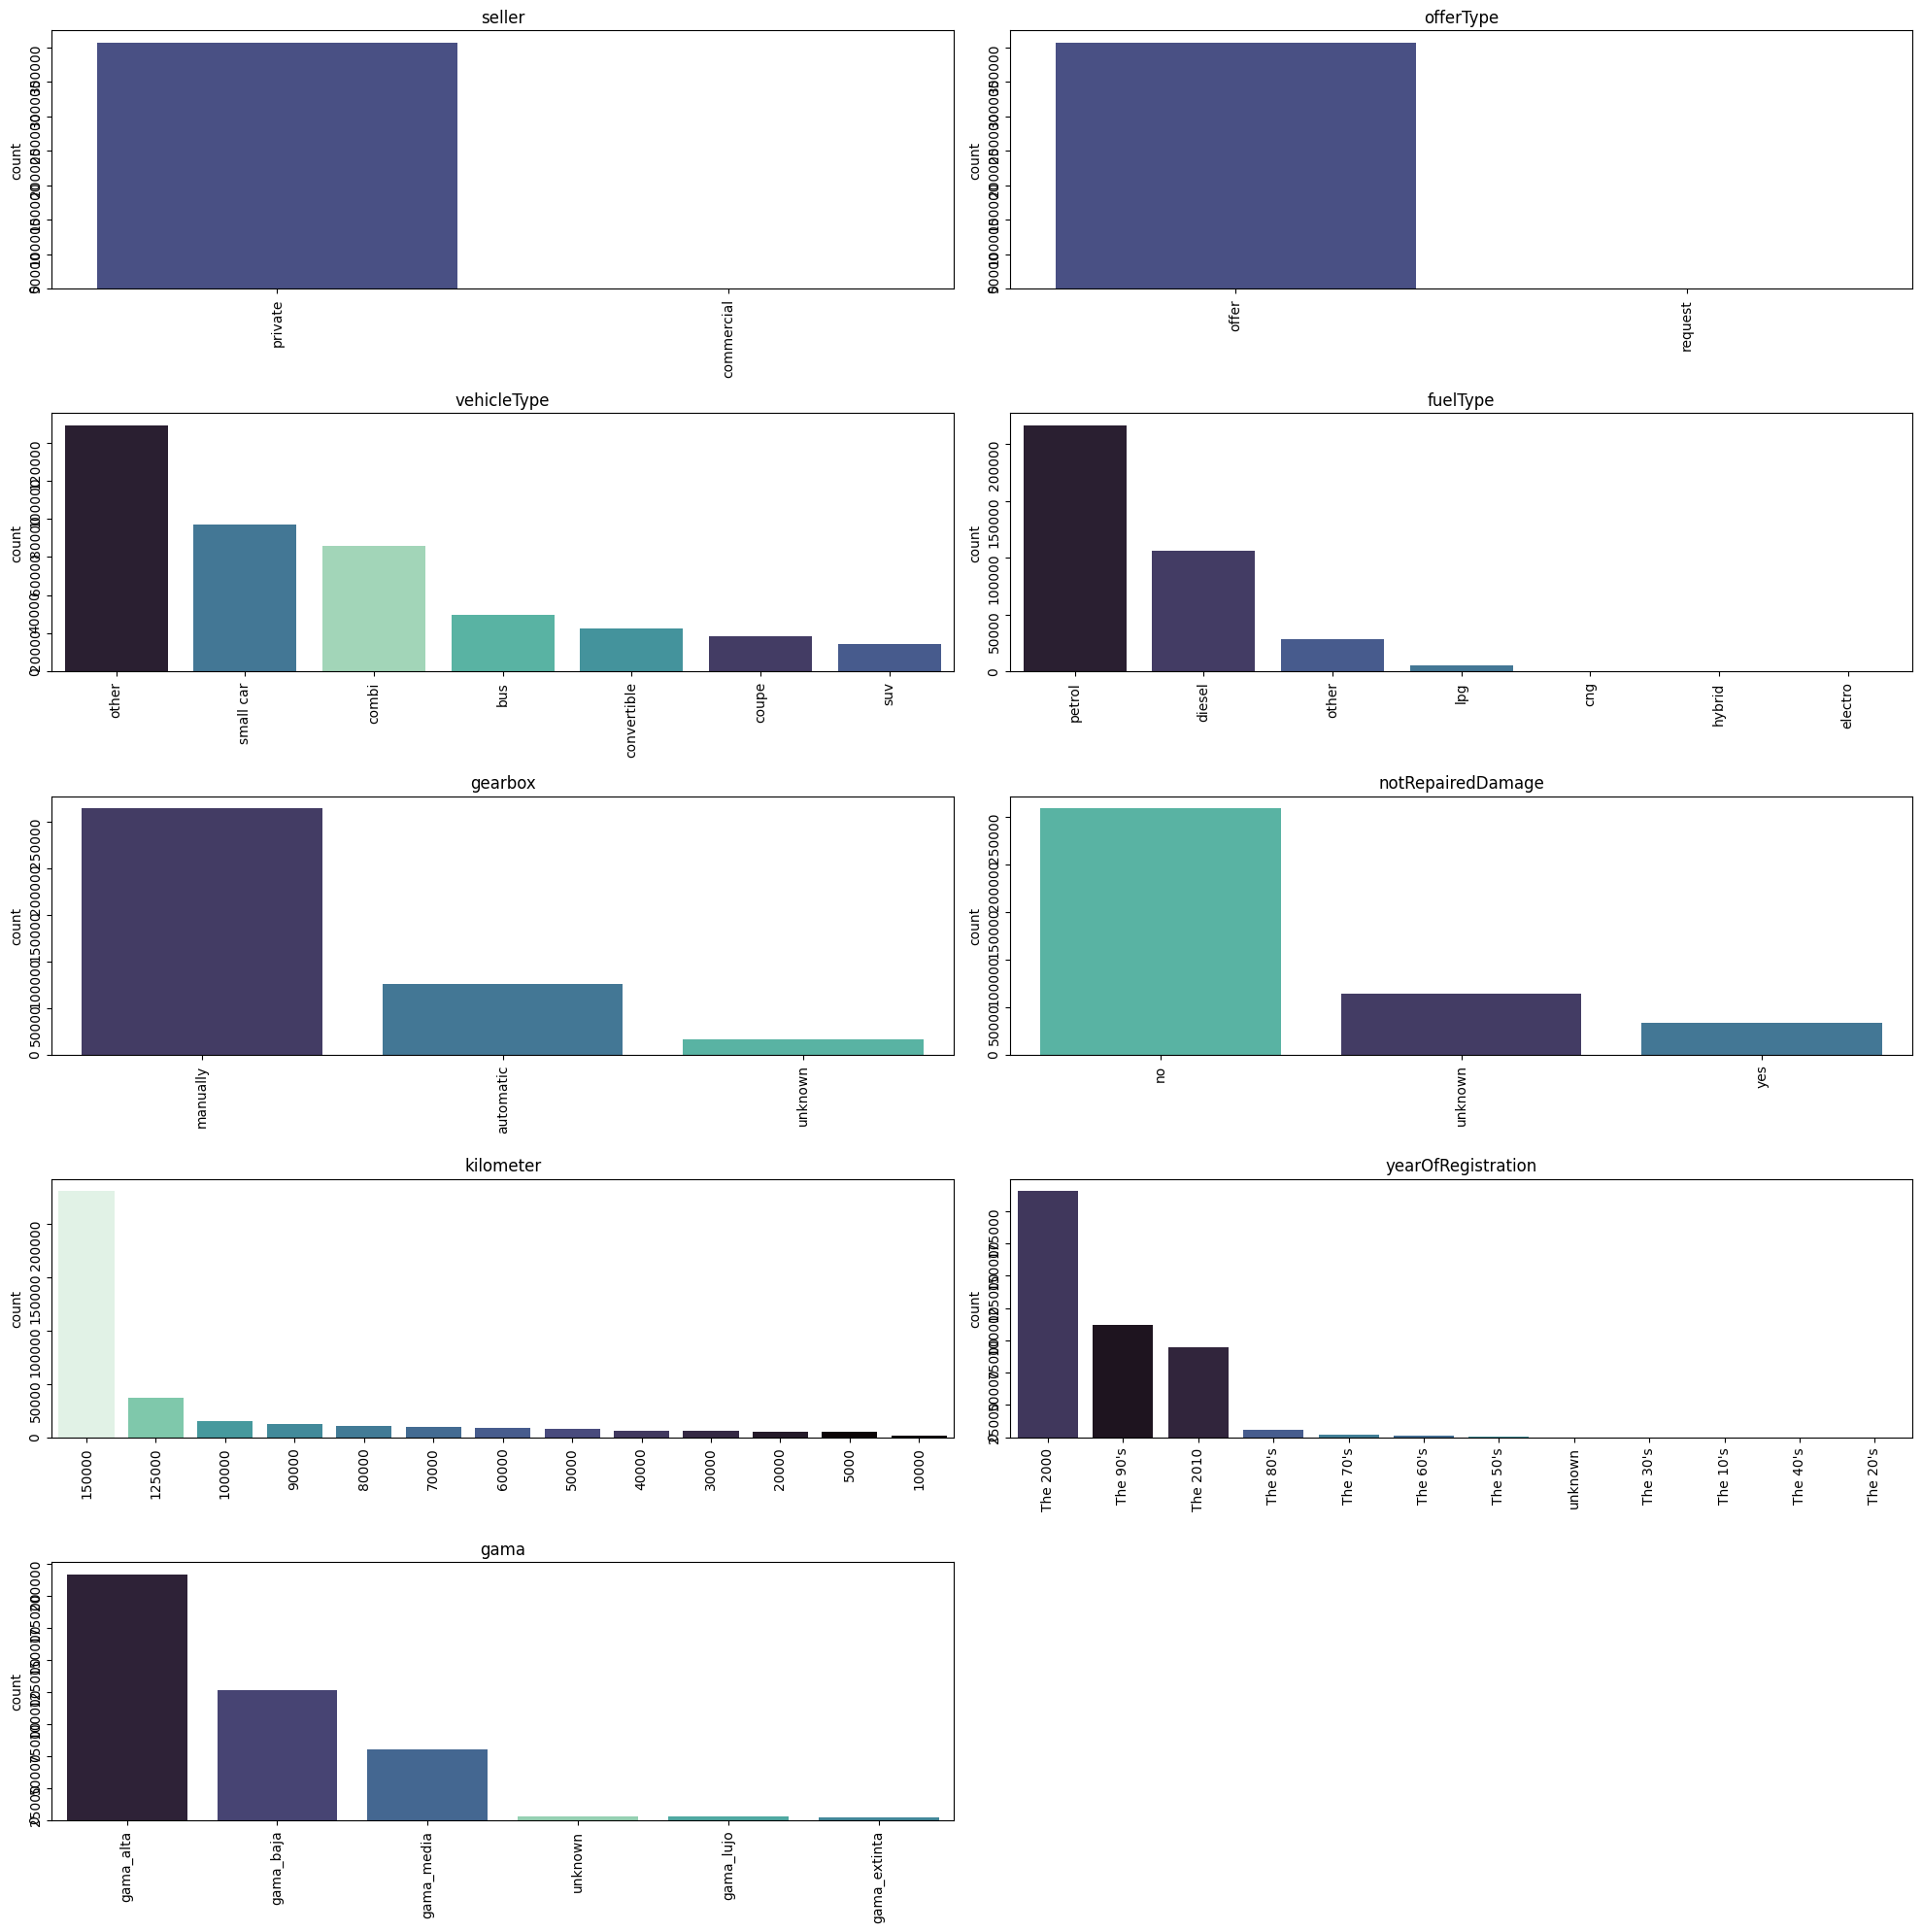

In [86]:
plot_categoricas(categoricas,grafica_size=(20,20))

### Visualizar los outliers con un boxplot

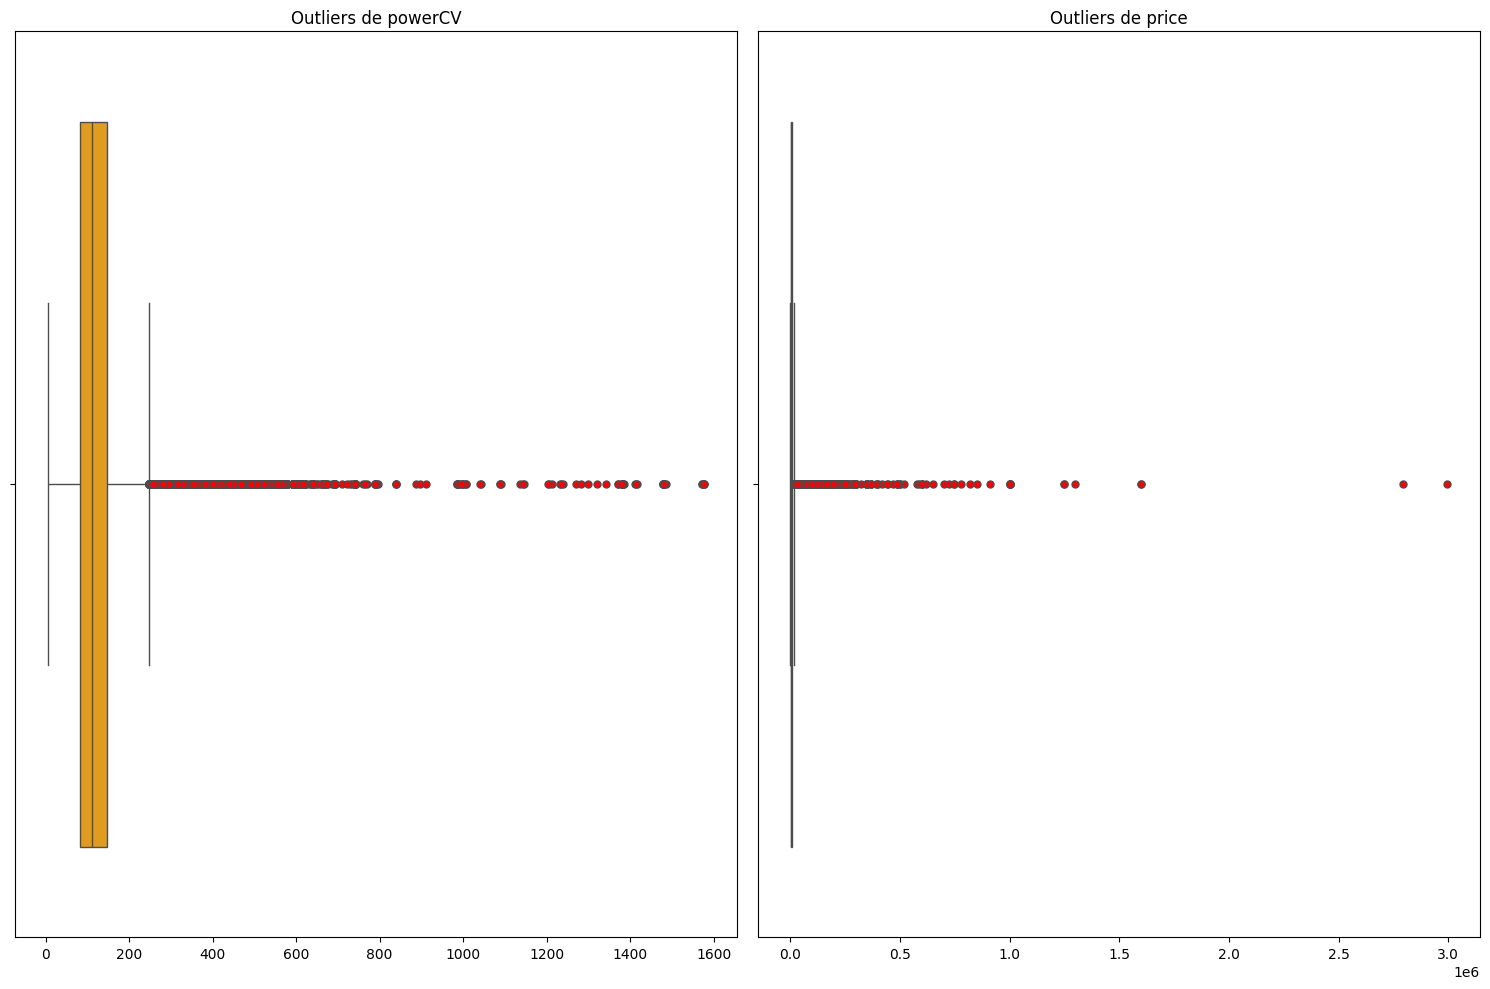

In [87]:
detectar_outliers(df)

# Matriz Correlación

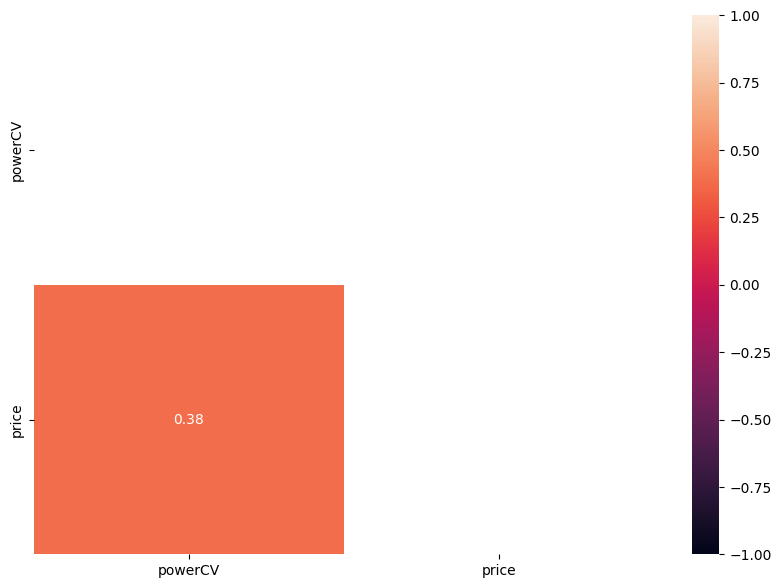

In [88]:
matriz_correlacion(df)

### Visualizar categoricas vs variable respuesta(barplot)


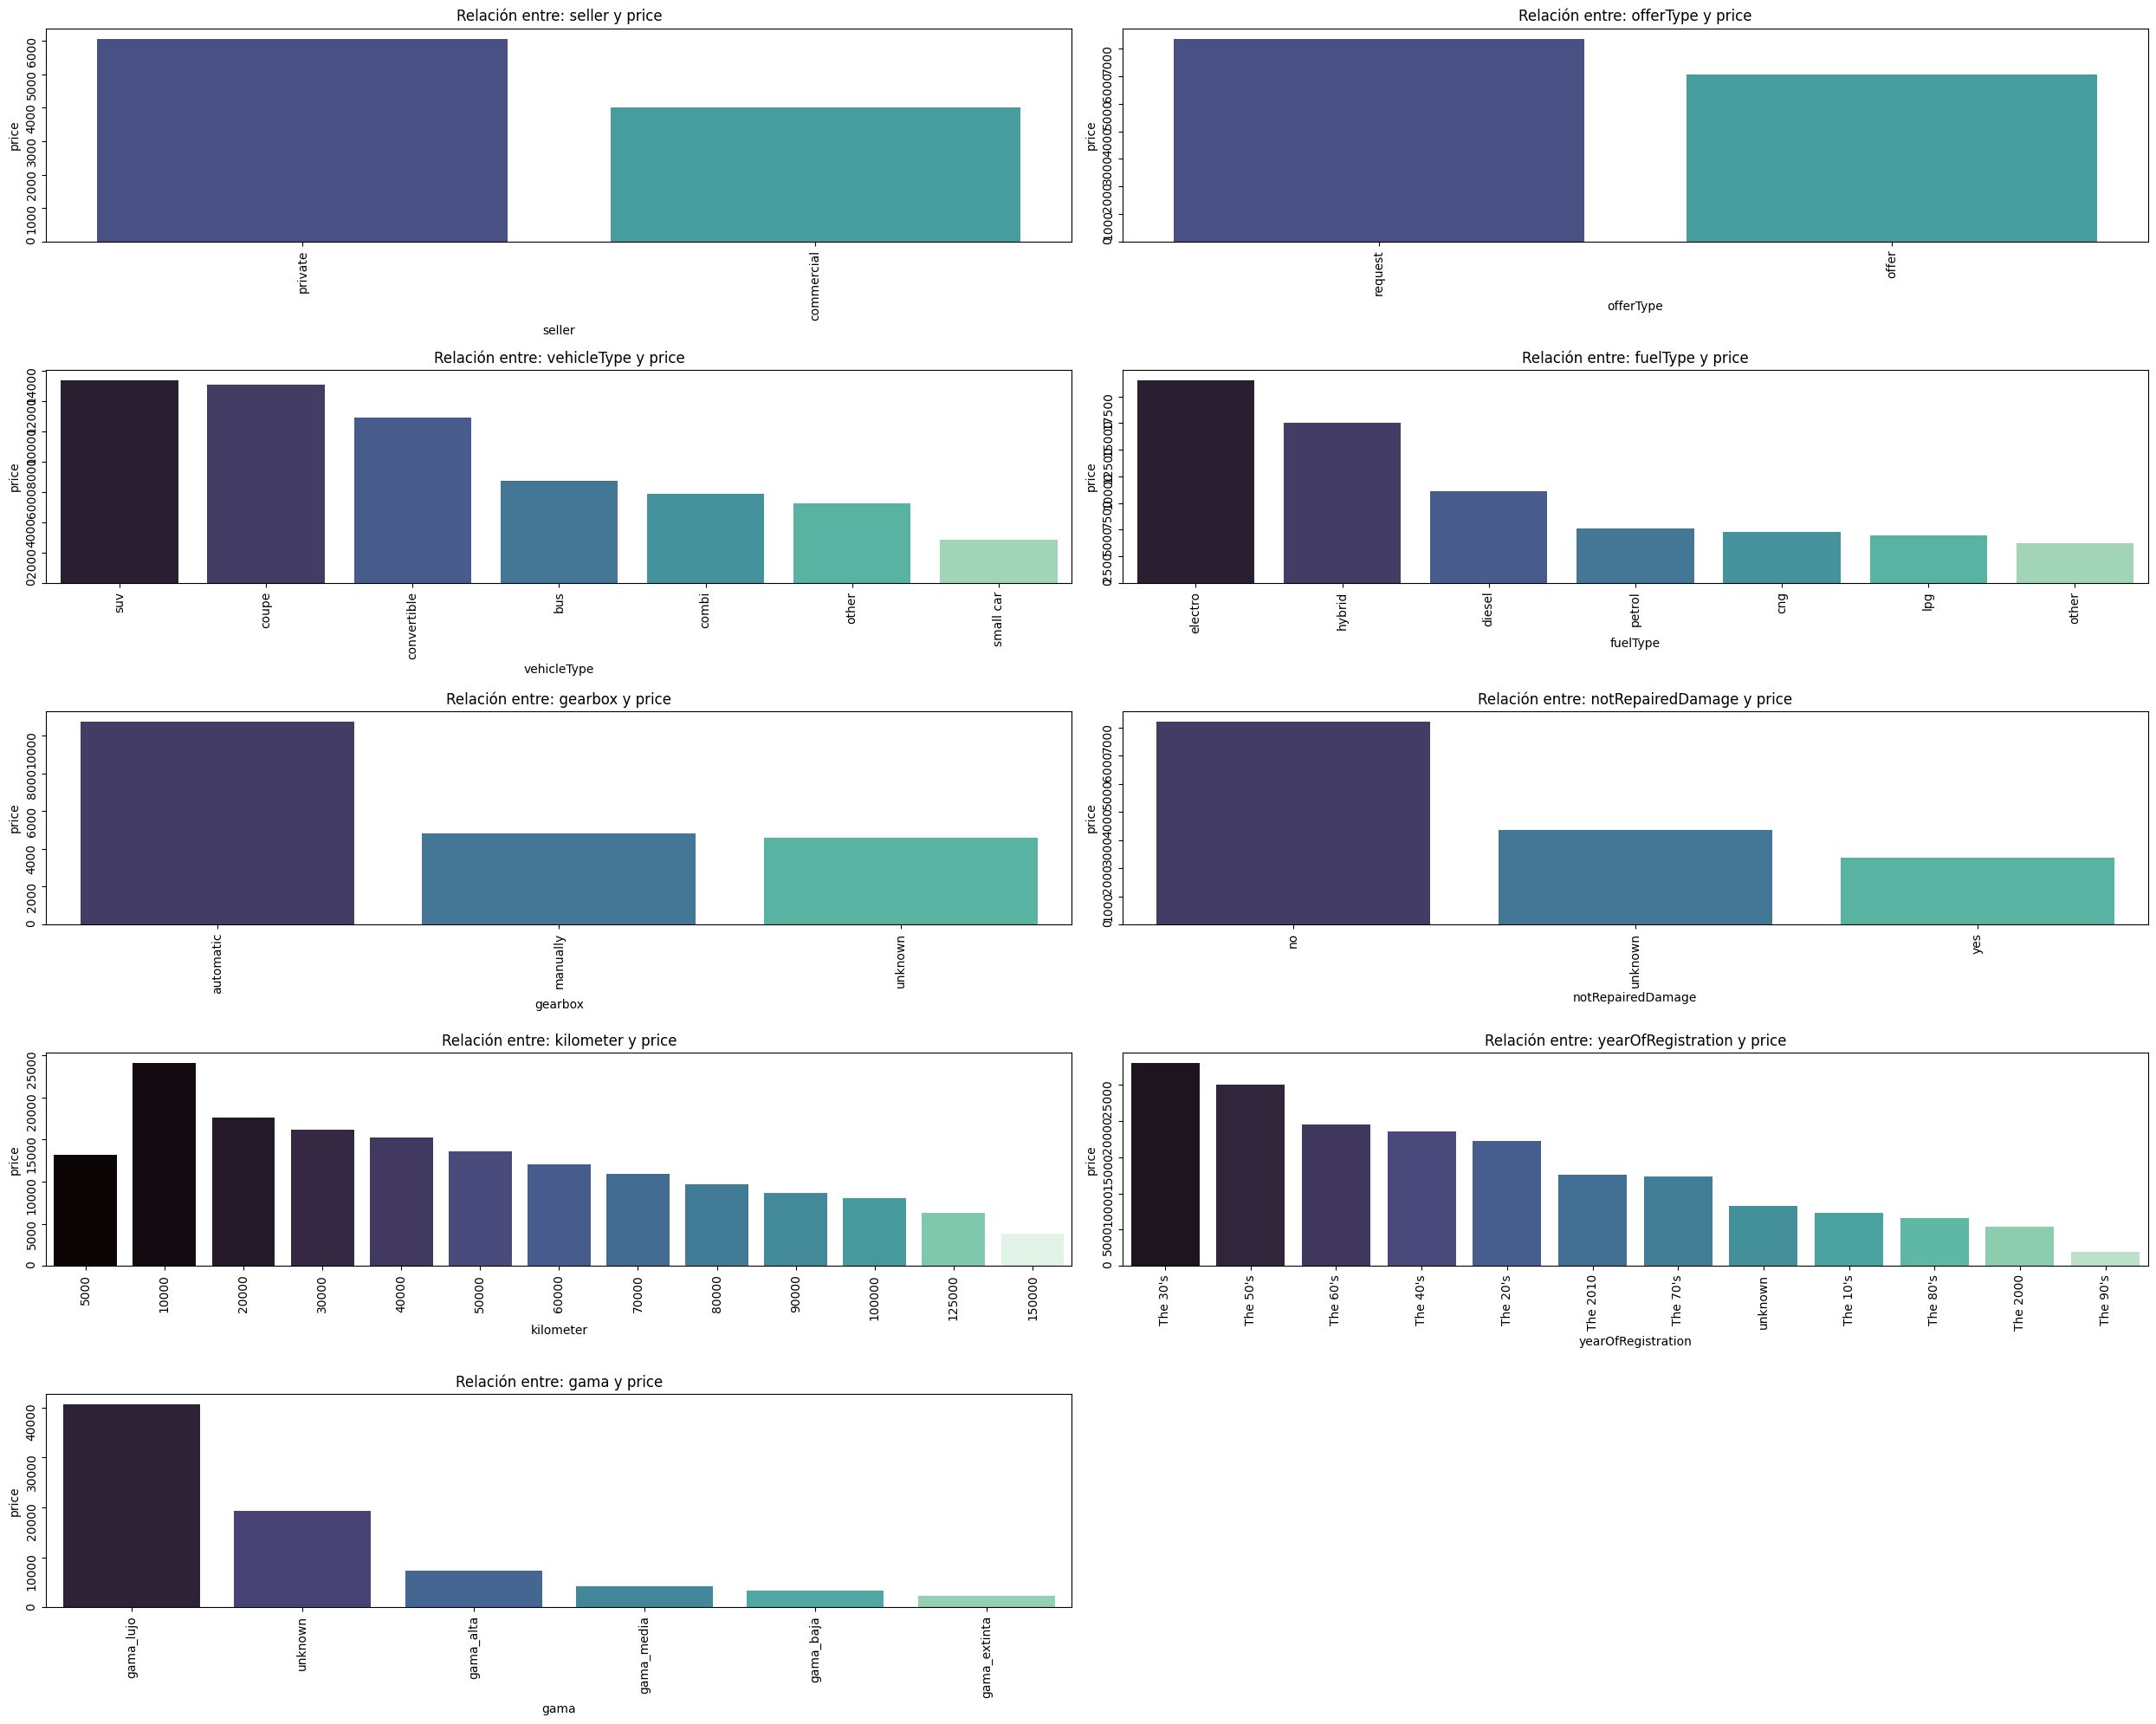

In [89]:
relacion_vr_categoricas(df,"price",grafica_size=(25,20))

### Visualizar numericas vs variable respuesta con un (scatterplot)

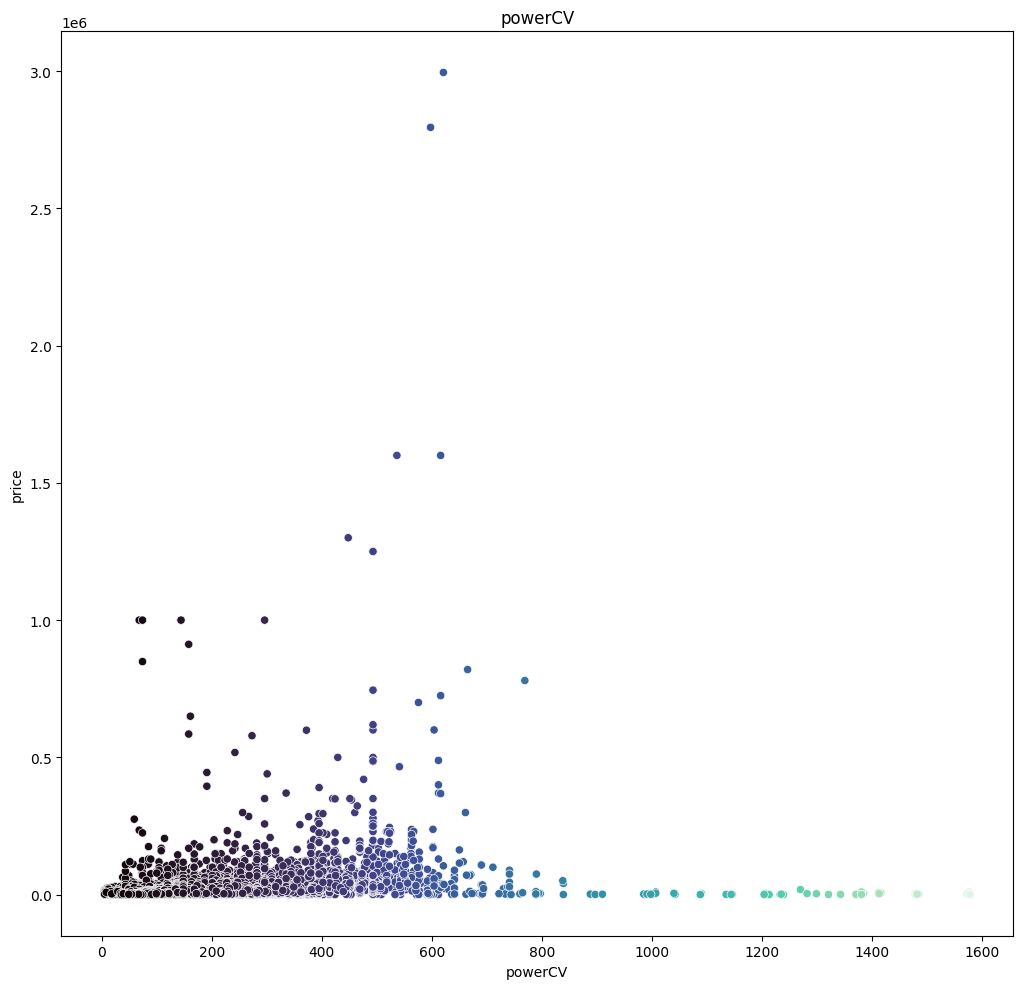

In [90]:
relacion_vr_numericas(df,"price",grafica_size=(20,10))

In [91]:
df.isnull().sum()

seller                0
offerType             0
vehicleType           0
fuelType              0
gearbox               0
notRepairedDamage     0
kilometer             0
powerCV               0
price                 0
yearOfRegistration    0
gama                  0
dtype: int64